# 16
给定物体直线运动数据，数据如下：

| 时间 $t$ (s) | 0 | 0.9 | 1.9 | 3.0 | 3.9 | 5.0 |
| --- | --- | --- | --- | --- | --- | --- |
| 距离 $s$ (m) | 0 | 10 | 30 | 50 | 80 | 110 |

## Solution

假设运动方程为  
$$
s(t) = A \, t^2 + B \, t
$$
由于 $s(0)=0$，不需要常数项。

目标是最小化残差平方和：  
$$
E(A,B) = \sum_{i=1}^{n} \left[ s_i - \left( A \, t_i^2 + B \, t_i \right) \right]^2
$$

对 $A$ 和 $B$ 求偏导数，并令其为零：

$$
\frac{\partial E}{\partial A} = -2 \sum_{i=1}^{n} t_i^2 \left[ s_i - \left( A \, t_i^2 + B \, t_i \right) \right] = 0,
$$
$$
\frac{\partial E}{\partial B} = -2 \sum_{i=1}^{n} t_i \left[ s_i - \left( A \, t_i^2 + B \, t_i \right) \right] = 0.
$$

整理后得到正规方程：

$$
\begin{cases}
A\sum t_i^4 + B\sum t_i^3 = \sum t_i^2 s_i, \\
A\sum t_i^3 + B\sum t_i^2 = \sum t_i s_i.
\end{cases}
$$

通过求解上述线性方程组，可以得到系数 $A$ 和 $B$。

系数 A (t^2) = 2.3134643556096797
系数 B (t) = 10.657588258559603


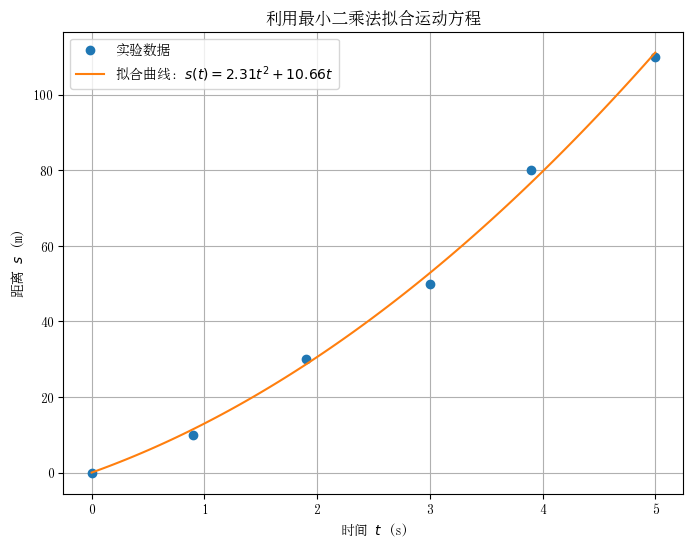

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['font.sans-serif'] = ['SimSong']  # 设置中文字体
mpl.rcParams['axes.unicode_minus'] = False  # 显示负号

# 给定数据
t = np.array([0, 0.9, 1.9, 3.0, 3.9, 5.0])
s = np.array([0, 10, 30, 50, 80, 110])

# 构建设计矩阵，列分别为 t^2 和 t
X = np.vstack((t**2, t)).T

# 使用最小二乘法求解 A 和 B，使得 s(t) = A*t^2 + B*t
coeff, residuals, rank, s_vals = np.linalg.lstsq(X, s, rcond=None)
A, B = coeff

print("系数 A (t^2) =", A)
print("系数 B (t) =", B)

# 生成拟合曲线的数据
t_fit = np.linspace(0, 5, 100)
s_fit = A * t_fit**2 + B * t_fit

plt.figure(figsize=(8, 6))
plt.plot(t, s, 'o', label='实验数据')
plt.plot(t_fit, s_fit, '-', label=f'拟合曲线: $s(t)={A:.2f}t^2+{B:.2f}t$')
plt.xlabel('时间 $t$ (s)')
plt.ylabel('距离 $s$ (m)')
plt.title('利用最小二乘法拟合运动方程')
plt.legend()
plt.grid(True)
plt.show()

# 17

已知实验数据

| $x_i$ | 19 | 25 | 31 | 38 | 44 |
|---------|----|----|----|----|----|
| $y_i$ | 19.0 | 32.3 | 49.0 | 73.3 | 97.8 |

要求拟合模型
$$
y = a + b x^2,
$$
并计算均方误差 (MSE)。

## Solution

令预测值为  
$$
\hat{y}_i = a + b x_i^2.
$$
构造残差平方和  
$$
E(a,b) = \sum_{i=1}^{n} \left[y_i - \left(a + b x_i^2\right)\right]^2.
$$
令对 $a$ 和 $b$ 的偏导数为零，可得到正规方程：
$$
\begin{cases}
n\,a + b\sum_{i=1}^{n}x_i^2 = \sum_{i=1}^{n}y_i,\\[1mm]
a\sum_{i=1}^{n}x_i^2 + b\sum_{i=1}^{n}x_i^4 = \sum_{i=1}^{n}x_i^2\,y_i.
\end{cases}
$$

使用 python 进行求解。

拟合参数 a = 0.9725786569067812
拟合参数 b = 0.05003512421916013
均方误差 MSE = 0.0030046417891329913


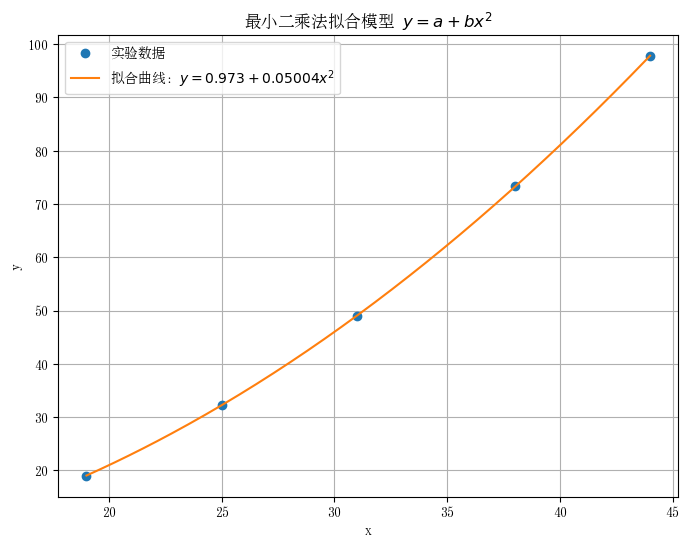

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# 给定数据
x = np.array([19, 25, 31, 38, 44])
y = np.array([19.0, 32.3, 49.0, 73.3, 97.8])

# 构建设计矩阵 X，其中第一列全为 1，第二列为 x^2
X = np.vstack((np.ones_like(x), x**2)).T

# 求解正规方程，得到最小二乘解 [a, b]
coeff, residuals, rank, s_vals = np.linalg.lstsq(X, y, rcond=None)
a, b = coeff

print("拟合参数 a =", a)
print("拟合参数 b =", b)

# 计算预测值
y_pred = a + b * x**2

# 计算均方误差 (MSE)
MSE = np.mean((y - y_pred)**2)
print("均方误差 MSE =", MSE)

# 生成拟合曲线数据用于绘图
x_fit = np.linspace(min(x), max(x), 200)
y_fit = a + b * x_fit**2

plt.figure(figsize=(8,6))
plt.plot(x, y, 'o', label='实验数据')
plt.plot(x_fit, y_fit, '-', label=f'拟合曲线: $y={a:.3f}+{b:.5f}x^2$')
plt.xlabel('x')
plt.ylabel('y')
plt.title('最小二乘法拟合模型 $y=a+bx^2$')
plt.legend()
plt.grid(True)
plt.show()

## 18

实验数据为

| 时间 $t$ (s)            | 0    | 5    | 10   | 15   | 20   | 25   | 30   | 35   | 40   | 45   | 50   | 55   |
|---------------------------|------|------|------|------|------|------|------|------|------|------|------|------|
| 浓度 $y\,(\times10^{-4})$ | 0    |1.27 |2.16 |2.86 |3.44 |3.87 |4.15 |4.37 |4.51 |4.58 |4.62 |4.64 |

使用最小二乘法求 $y = f(t)$

## Solution

使用更符合化学反应条件的一阶反应的动力学模型进行拟合，其形式为

$$
y(t)= C\Bigl(1-\exp(-kt)\Bigr),
$$


该模型满足初值条件 $y(0)=0$ 且当 $t\to\infty$ 时 $y(t)\to C$，比较符合实际反应过程。

目标是最小化残差平方和

$$
E(C,k)= \sum_{i=1}^{n}\Bigl[y_i - C\Bigl(1-\exp(-k\,t_i)\Bigr)\Bigr]^2.
$$

由于该模型是非线性的，故利用 Python 中的 `curve_fit`求解参数 $C$ 和 $k$。

拟合参数 C = 4.900232518079594
拟合参数 k = 0.060402839872791304


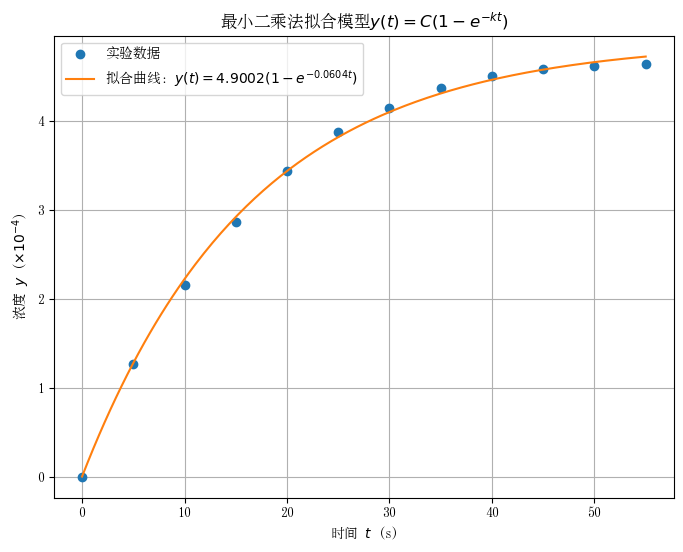

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import matplotlib as mpl

# 设置中文字体和负号显示
mpl.rcParams['font.sans-serif'] = ['SimSong']
mpl.rcParams['axes.unicode_minus'] = False

# 给定数据
t = np.array([0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55])
y = np.array([0, 1.27, 2.16, 2.86, 3.44, 3.87, 4.15, 4.37, 4.51, 4.58, 4.62, 4.64])

# 定义一阶反应模型： y(t) = C * (1 - exp(-k * t))
def model(t, C, k):
    return C * (1 - np.exp(-k * t))

# 提供初始猜测，C初猜为数据末值，k初猜可选0.1
p0 = [4.64, 0.1]

# 使用 curve_fit 进行非线性拟合
params, covariance = curve_fit(model, t, y, p0=p0)
C, k = params

print("拟合参数 C =", C)
print("拟合参数 k =", k)

# 生成拟合曲线数据
t_fit = np.linspace(0, 55, 200)
y_fit = model(t_fit, C, k)

plt.figure(figsize=(8,6))
plt.plot(t, y, 'o', label='实验数据')
plt.plot(t_fit, y_fit, '-', label=f'拟合曲线: $y(t)={C:.4f}(1-e^{{-{k:.4f}t}})$')
plt.xlabel('时间 $t$ (s)')
plt.ylabel('浓度 $y$ ($\\times10^{-4}$)')
plt.title('最小二乘法拟合模型$y(t) = C(1-e^{-kt})$')
plt.legend()
plt.grid(True)
plt.show()

# 22

求

$$
f(x) = \frac{1}{x} \ln (1 + x)
$$

在 $x = 0$ 处的 $(1, 1)$ 阶帕德逼近 $R_{11}(x)$

## Solution

由于
$$
\ln(1+x)= x -\frac{x^2}{2}+\frac{x^3}{3}-\frac{x^4}{4}+\cdots,
$$
故
$$
f(x)=\frac{1}{x}\ln(1+x) = 1-\frac{x}{2}+\frac{x^2}{3}-\frac{x^3}{4}+\cdots.
$$

设 $(1,1)$ 阶帕德逼近为

$$
R_{11}(x)=\frac{a_0+a_1 x}{1+b_1 x}.
$$
展开 $R_{11}(x)$：
$$
R_{11}(x)= \bigl(a_0+a_1x\bigr)\left(1-b_1x+b_1^2x^2+\cdots\right)
= a_0 + (a_1-a_0b_1)x + (a_0b_1^2-a_1b_1)x^2+\cdots.
$$

要求 $R_{11}(x)$ 与 $f(x)$ 的展开一致至 $x^2$ 阶，因此需满足：
$$
\begin{cases}
a_0=1,\\[1mm]
a_1-a_0b_1=a_1-b_1=-\dfrac{1}{2},\\[1mm]
a_0b_1^2-a_1b_1=b_1^2-a_1b_1=\dfrac{1}{3}.
\end{cases}
$$

令 $a_0=1$，则由第二个方程有
$$
a_1=b_1-\frac{1}{2}.
$$
代入第三个方程：
$$
b_1^2-\left(b_1-\frac{1}{2}\right)b_1 = b_1^2 - b_1^2+\frac{1}{2}b_1 = \frac{b_1}{2}=\frac{1}{3}.
$$
从而
$$
b_1=\frac{2}{3}.
$$
$$
a_1=\frac{2}{3}-\frac{1}{2}=\frac{4-3}{6}=\frac{1}{6}.
$$

因此，$(1,1)$ 阶帕德逼近为
$$
\boxed{R_{11}(x)=\frac{1+\frac{1}{6}x}{1+\frac{2}{3}x}.}
$$

# 24

使用 FFT 算法，求函数 $f(x) = |x|$ 在 $[-\pi, \pi]$ 上的 4 次三角插值多项式 $S_4(x)$

# Solution

使用 python 完成 FFT 算法的计算。

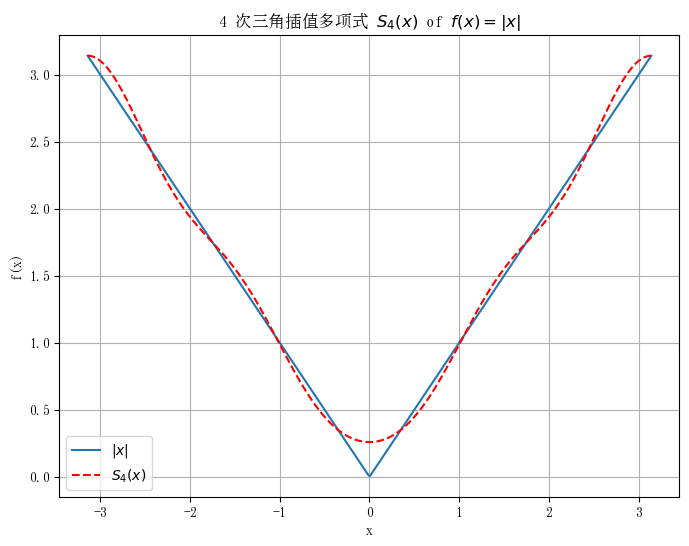

傅里叶系数（归一化）：
c0 = 1.5901888740392778
c_1 = -0.6431235280690197
c_2 = 0.02196156197534019
c_3 = -0.0775701889775252
c_4 = 0.033046610753371515


In [25]:
import numpy as np
import matplotlib.pyplot as plt
import math

def manual_fft(x):
    N = len(x)
    X = []
    for k in range(N):
        s = 0 + 0j
        for j in range(N):
            angle = -2 * math.pi * j * k / N
            s += x[j] * complex(math.cos(angle), math.sin(angle))
        X.append(s)
    return X

# 采样点数 N = 9，采样区间为 [-π, π]
N = 9
j = np.arange(N)
x_samples = -math.pi + 2 * math.pi * j / N
f_samples = [abs(xi) for xi in x_samples]

# 计算 DFT 并归一化
X = manual_fft(f_samples)
X_normalized = [val / N for val in X]

# 由于采样区间为 [-π, π]，而标准 DFT 是针对 [0,2π]，
# 因此需要对傅里叶系数乘以修正因子 exp(iπk) = (-1)^k。
c0 = X_normalized[0].real  # k = 0不变
c = []
for k in range(1, 5):
    c_k_corrected = X_normalized[k].real * ((-1)**k)
    c.append(c_k_corrected)

def S4(x_val):
    S = c0
    for k in range(1, 5):
        S += 2 * c[k - 1] * math.cos(k * x_val)
    return S

# 画出原函数 |x| 和 4 次三角插值多项式 S4(x)
x_fine = np.linspace(-math.pi, math.pi, 400)
f_fine = [abs(xi) for xi in x_fine]
S4_fine = [S4(xi) for xi in x_fine]

plt.figure(figsize=(8,6))
plt.plot(x_fine, f_fine, label=r'$|x|$')
plt.plot(x_fine, S4_fine, '--r', label=r'$S_4(x)$')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('4 次三角插值多项式 $S_4(x)$ of $f(x)=|x|$')
plt.legend()
plt.grid(True)
plt.show()

print("傅里叶系数（归一化）：")
print("c0 =", c0)
for k in range(1, 5):
    print(f"c_{k} =", c[k-1])

# 1

确定下列求积公式中的待定参数，使其代数精度尽量高，并指明所构造出的求积公式所具有的代数精度：

(2)

$$
\int_{-2h}^{2h} f(x) dx \approx A_{-1}f(-h) + A_0f(0) + A_1f(h)
$$

(3)

$$
\int_{-1}^1 f(x)dx \approx \left[ f(-1) + 2f(x_1) + 3f(x_2) \right] / 3
$$

(4)

$$
\int_{0}^hf(x)dx \approx h[f(0) + f(h)] / 2 + ah^2[f'(0) - f'(h)]
$$

## (2) 求积公式

$$
\int_{-2h}^{2h} f(x)\,dx \approx A_{-1} f(-h) + A_0 f(0) + A_1 f(h).
$$

令其对 $f(x)=1,x,x^2,x^3,\dots$ 精确，建立以下条件：

1. 当 $f(x)=1$ 时，
   $$
   \int_{-2h}^{2h}1\,dx=4h,\quad
   A_{-1}+A_0+A_1=4h.
   $$

2. 当 $f(x)=x$ 时，
   $$
   \int_{-2h}^{2h}x\,dx=0,\quad
   -hA_{-1}+0\cdot A_0+hA_1=0 \quad\Longrightarrow\quad A_1=A_{-1}.
   $$

3. 当 $f(x)=x^2$ 时，
   $$
   \int_{-2h}^{2h}x^2\,dx = \left[\frac{x^3}{3}\right]_{-2h}^{2h} = \frac{16h^3}{3},
   $$
   而右侧为
   $$
   A_{-1}(h^2)+A_0\cdot0^2+A_1(h^2) = (A_{-1}+A_{1})h^2=2A_{-1}\,h^2.
   $$
   故有
   $$
   2A_{-1}\,h^2 = \frac{16h^3}{3}\quad\Longrightarrow\quad A_{-1}=\frac{8h}{3}.
   $$
   从而 $A_1=\frac{8h}{3}$。

4. 由条件 (1) 得：
   $$
   \frac{8h}{3} + A_0 + \frac{8h}{3} = 4h
   \quad\Longrightarrow\quad A_0=4h-\frac{16h}{3}=-\frac{4h}{3}.
   $$

检验 \(f(x)=x^3\) 时：
$$
\int_{-2h}^{2h}x^3\,dx=0,\quad
-A_{-1}h^3+A_1h^3=0,
$$
自动成立。

但对于 $f(x)=x^4$ 不精确，因此此公式在多项式上的最大精度为**3**。

$$\boxed{
A_{-1}=\dfrac{8h}{3},\quad A_0=-\dfrac{4h}{3},\quad A_1=\dfrac{8h}{3}.}
$$,

---

## (3) 求积公式

$$
\int_{-1}^1 f(x)\,dx \approx \frac{f(-1)+2f(x_1)+3f(x_2)}{3}.
$$

设对多项式 $f(x)=1, x, x^2$ 精确。

1. 当 $f(x)=1$ 时，
   $$
   \int_{-1}^1 1\,dx =2,\quad \frac{1+2+3}{3}=\frac{6}{3}=2.
   $$
   自动成立。

2. 当 $f(x)=x$ 时，
   $$
   \int_{-1}^1 x\,dx =0,\quad
   \frac{(-1)+2x_1+3x_2}{3}=0 \quad\Longrightarrow\quad -1+2x_1+3x_2=0.
   $$
   记作（Ⅰ）：  
   $$
   2x_1+3x_2=1.
   $$

3. 当 $f(x)=x^2$ 时，
   $$
   \int_{-1}^1 x^2\,dx = \frac{2}{3},\quad
   \frac{1+2x_1^2+3x_2^2}{3}=\frac{2}{3}\quad\Longrightarrow\quad 1+2x_1^2+3x_2^2=2.
   $$
   即（Ⅱ）：
   $$
   2x_1^2+3x_2^2=1.
   $$

从（Ⅰ）可解得
$$
x_1=\frac{1-3x_2}{2}.
$$

将其代入（Ⅱ）：
$$
2\left(\frac{1-3x_2}{2}\right)^2+3x_2^2=1
\quad\Longrightarrow\quad \frac{(1-3x_2)^2}{2}+3x_2^2=1.
$$

解二次方程：
$$
x_2=\frac{3\pm2\sqrt{6}}{15}.
$$

为使节点按递增顺序（且落在 \([-1,1]\) 内），取
$$
x_2=\frac{3+2\sqrt{6}}{15}\quad\text{(约 }0.5266\text{)},
$$
则从（Ⅰ）有
$$
x_1=\frac{1-3x_2}{2}=\frac{1-\sqrt{6}}{5}\quad\text{(约 }-0.2899\text{)}.
$$

验证：
- 对 $f(x)=1$ 和 $f(x)=x$ 均满足，
- 检验 $f(x)=x^2$ 自动成立。

对于 $f(x)=x^3$ 不满足，因此此公式能精确积分次数不超过 2。

$$\boxed{
x_1=\dfrac{1-\sqrt{6}}{5},\quad x_2=\dfrac{3+2\sqrt{6}}{15}.}
$$

---

## (4) 求积公式

$$
\int_{0}^{h} f(x)\,dx \approx \frac{h\bigl[f(0)+f(h)\bigr]}{2} + a\,h^2\Bigl[f'(0)-f'(h)\Bigr].
$$

利用泰勒展开，令
$$
f(x)=f(0)+f'(0)x+\frac{f''(0)x^2}{2}+\frac{f'''(0)x^3}{6}+\cdots.
$$

积分展开为
$$
\begin{aligned}
I &=\int_{0}^{h} f(x)\,dx
=\int_{0}^{h}\Bigl[f(0)+f'(0)x+\frac{f''(0)x^2}{2}+\frac{f'''(0)x^3}{6}+\cdots\Bigr]dx\\[1mm]
&=f(0)h+\frac{f'(0)h^2}{2}+\frac{f''(0)h^3}{6}+\frac{f'''(0)h^4}{24}+\cdots.
\end{aligned}
$$

先展开
$$
\frac{h\bigl[f(0)+f(h)\bigr]}{2}.
$$
注意 $f(h)=f(0)+f'(0)h+\frac{f''(0)h^2}{2}+\frac{f'''(0)h^3}{6}+\cdots$；
因此，
$$
\begin{aligned}
\frac{h[f(0)+f(h)]}{2} &=\frac{h}{2}\Bigl[2f(0)+f'(0)h+\frac{f''(0)h^2}{2}+\frac{f'''(0)h^3}{6}+\cdots\Bigr]\\[1mm]
&= f(0)h+\frac{f'(0)h^2}{2}+\frac{f''(0)h^3}{4}+\frac{f'''(0)h^4}{12}+\cdots.
\end{aligned}
$$

再展开
$$
a\,h^2\Bigl[f'(0)-f'(h)\Bigr].
$$
由于
$$
f'(h)=f'(0)+f''(0)h+\frac{f'''(0)h^2}{2}+\cdots,
$$
有
$$
f'(0)-f'(h)=-f''(0)h-\frac{f'''(0)h^2}{2}-\cdots,
$$
因此，
$$
a\,h^2\Bigl[f'(0)-f'(h)\Bigr]=-a\,f''(0)h^3-\frac{a\,f'''(0)h^4}{2}+\cdots.
$$

合并后，求积公式给出
$$
\begin{aligned}
Q &= f(0)h+\frac{f'(0)h^2}{2}+\Bigl(\frac{f''(0)}{4}-a\,f''(0)\Bigr)h^3
+\Bigl(\frac{f'''(0)}{12}-\frac{a\,f'''(0)}{2}\Bigr)h^4+\cdots\\[1mm]
&= f(0)h+\frac{f'(0)h^2}{2} + \left(\frac{1}{4}-a\right)f''(0)h^3
+\left(\frac{1}{12}-\frac{a}{2}\right)f'''(0)h^4+\cdots.
\end{aligned}
$$

要求 $Q$ 与真实积分展开一致，即：
- $h^1$ 与 $h^2$ 项自动匹配，
- 对 $h^3$ 项要求
  $$
  \frac{1}{4}-a=\frac{1}{6}\quad\Longrightarrow\quad a=\frac{1}{4}-\frac{1}{6}=\frac{1}{12}.
  $$
- 此时 $h^4$ 项为
  $$
  \frac{1}{12}-\frac{a}{2} = \frac{1}{12}-\frac{1}{24}=\frac{1}{24},
  $$
  同真实值一致。

故

$$\boxed{
a=\frac{1}{12}.
}
$$

此时该公式对 $f(x)$ 的泰勒展开至 $h^4$ 项吻合，即它对多项式的精度达到**3**。

# 2(3)

分别用梯形公式和辛普森公式计算下列积分

$$
\int_{0}^{\pi /6} \sqrt{4 - \sin^2(\varphi)} \,d\varphi, \quad n = 6
$$

## Solution

积分区间为 $[a, b] = [0, \pi/6]$，步长  
$$
h = \frac{b-a}{n}=\frac{\pi/6}{6}=\frac{\pi}{36}.
$$

复合梯形公式为  
$$
T = \frac{h}{2}\Bigl[f(x_0)+f(x_n)+2\sum_{j=1}^{n-1}f(x_j)\Bigr],
$$
复合辛普森公式为  
$$
S = \frac{h}{6}\Bigl[f(a)+4\sum_{k = 0}^{n - 1}f(x_{k + 1/2})+2\sum_{k=1}^{n-1}f(x_j) + f(b)\Bigr].
$$

In [29]:
import numpy as np

def f(phi):
    return np.sqrt(4 - np.sin(phi)**2)

# 积分区间 [a, b] = [0, π/6]，分割数 n = 6
a = 0
b = np.pi / 6
n = 6
h = (b - a) / n  # h = π/36

# 生成节点：x0, x1, ..., x6
x = np.linspace(a, b, n+1)
# 计算每个小区间的中点
x_mid = (x[:-1] + x[1:]) / 2

# 按照复合梯形公式计算
T = h/2 * ( f(x[0]) + f(x[-1]) + 2 * np.sum(f(x[1:-1])) )
print("复合梯形公式近似：", T)

# 按照复合辛普森公式计算
S = h/6 * ( f(x[0]) + f(x[-1])
            + 4 * np.sum(f(x_mid))
            + 2 * np.sum(f(x[1:-1]) ) )

print("复合辛普森公式近似：", S)

复合梯形公式近似： 1.0356219003136578
复合辛普森公式近似： 1.0357638857574465


# 3

直接验证柯特斯公式

$$
C = \frac{b - a}{90}\left[7f(x_0) + 32f(x_1) + 12f(x_2) + 32f(x_3) + 7f(x_4)\right]
$$

其中，$x_k = a + kh, \quad h = \frac{b - a}{4}$

具有 5 次代数精度。

## Solution

### 1. 当 $f(x)=1$ 时

- **精确积分：**
  $$
  I = \int_0^4 1\,dx=4.
  $$

- **柯特斯公式计算：**
  $$
  C(1)=\frac{4}{90}\Bigl[7\cdot1+32\cdot1+12\cdot1+32\cdot1+7\cdot1\Bigr]=4.
  $$

因此，二者相等。

---

### 2. 当 $f(x)=x$ 时

- **精确积分：**
  $$
  I = \int_0^4 x\,dx=\frac{4^2}{2}=8.
  $$

- **柯特斯公式计算：**
  $$
  \begin{aligned}
  C(x)
  &=\frac{4}{90}\Bigl[7\cdot0+32\cdot1+12\cdot2+32\cdot3+7\cdot4\Bigr]\\[1mm]&=8.
  \end{aligned}
  $$

---

### 3. 当 $f(x)=x^2$ 时

- **精确积分：**
  $$
  I = \int_0^4 x^2\,dx = \frac{4^3}{3} = \frac{64}{3}.
  $$

- **柯特斯公式计算：**
  $$
  \begin{aligned}
  C(x^2)
  &=\frac{4}{90}\Bigl[7\cdot0^2+32\cdot1^2+12\cdot2^2+32\cdot3^2+7\cdot4^2\Bigr]\\[1mm]&= \frac{64}{3}.
  \end{aligned}
  $$

---

### 4. 当 $f(x)=x^3$ 时

- **精确积分：**
  $$
  I = \int_0^4 x^3\,dx = \frac{4^4}{4} = 64.
  $$

- **柯特斯公式计算：**
  $$
  \begin{aligned}
  C(x^3)
  &=\frac{4}{90}\Bigl[7\cdot0^3+32\cdot1^3+12\cdot2^3+32\cdot3^3+7\cdot4^3\Bigr]\\[1mm]&= 64.
  \end{aligned}
  $$

---

### 5. 当 $f(x)=x^4$ 时

- **精确积分：**
  $$
  I = \int_0^4 x^4\,dx = \frac{4^5}{5} = \frac{1024}{5}.
  $$

- **柯特斯公式计算：**
  $$
  \begin{aligned}
  C(x^4)
  &=\frac{4}{90}\Bigl[7\cdot0^4+32\cdot1^4+12\cdot2^4+32\cdot3^4+7\cdot4^4\Bigr]\\[1mm]&= \frac{1024}{5}.
  \end{aligned}
  $$

---

### 6. 当 $f(x)=x^5$ 时

- **精确积分：**
  $$
  I = \int_0^4 x^5\,dx = \frac{4^6}{6} = \frac{2048}{3}.
  $$

- **柯特斯公式计算：**
  $$
  \begin{aligned}
  C(x^5)
  &=\frac{4}{90}\Bigl[7\cdot0^5+32\cdot1^5+12\cdot2^5+32\cdot3^5+7\cdot4^5\Bigr]\\[1mm]
  &=\frac{2048}{3}
  \end{aligned}
  $$

使用 python 进行验证。

In [10]:
import sympy as sp

# 定义变量和区间
x = sp.symbols('x', real=True)
a_val = sp.Integer(0)
b_val = sp.Integer(4)
h = (b_val - a_val) / 4  # h = 1

# 定义节点（符号表达式）和权重（符号）
nodes = [a_val + i * h for i in range(5)]  # x0, x1, x2, x3, x4
weights = [sp.Integer(7), sp.Integer(32), sp.Integer(12), sp.Integer(32), sp.Integer(7)]

# 定义柯特斯公式（Boole 公式）的符号近似
def cotes_approx(f_expr):
    approx = (b_val - a_val) / sp.Integer(90) * sum(w * f_expr.subs(x, xi) for w, xi in zip(weights, nodes))
    return sp.simplify(approx)

# 定义符号化的精确积分
def exact_integral(f_expr):
    return sp.integrate(f_expr, (x, a_val, b_val))

# 验证多项式 f(x)=x^k, k = 0,...,5 的精确性，并以符号形式显示近似值与精确积分
for k in range(7):
    f_expr = x**k
    approx_val = cotes_approx(f_expr)
    exact_val = sp.simplify(exact_integral(f_expr))
    print(f"对于 f(x)=x^{k}, 柯特斯公式:{sp.pretty(approx_val)}, 精确积分: {sp.pretty(exact_val)}")

对于 f(x)=x^0, 柯特斯公式:4, 精确积分: 4
对于 f(x)=x^1, 柯特斯公式:8, 精确积分: 8
对于 f(x)=x^2, 柯特斯公式:64/3, 精确积分: 64/3
对于 f(x)=x^3, 柯特斯公式:64, 精确积分: 64
对于 f(x)=x^4, 柯特斯公式:1024/5, 精确积分: 1024/5
对于 f(x)=x^5, 柯特斯公式:2048/3, 精确积分: 2048/3
对于 f(x)=x^6, 柯特斯公式:7040/3, 精确积分: 16384/7


# 4

用辛普森公式求

$$
\int_0^1 e^{-x} \, dx
$$

并估计误差。

## Solution

对于区间 $[a,b]=[0,1]$ ，辛普森公式为

$$
S = \frac{b-a}{6}\Bigl[ f(a) + 4f\Bigl(\frac{a+b}{2}\Bigr) + f(b) \Bigr].
$$

对于 $f(x)=e^{-x}$，有

$$
f(0)=1,\quad f\Bigl(\frac{0+1}{2}\Bigr)= e^{-1/2},\quad f(1)=e^{-1}.
$$

因此，近似值为

$$\boxed{
S=\frac{1}{6}\Bigl[ 1 + 4e^{-1/2} + e^{-1}\Bigr].}
$$

而精确积分为

$$
I=\int_0^1 e^{-x}\,dx = 1 - e^{-1} .
$$


辛普森公式的截断误差表达式为

$$
E_S=-\frac{(b-a)^5}{180\,n^4}\,f^{(4)}(\xi),
$$
其中 $\xi\in[0,1]$，该公式实际上等价于 $n=2$ 的情形。

对于 $f(x)=e^{-x}$，其四阶导数为

$$
f^{(4)}(x)=e^{-x},
$$
在 $[0,1]$ 上取最大值为 $e^0=1$。因此，误差绝对值满足

$$\boxed{
\lvert E_S \rvert \le \frac{1^5}{180\cdot 2^4} = \frac{1}{2880}.}
$$

# 5

推导下列三种矩形求积公式

$$
\begin{aligned}
\int_a^b f(x) dx &= (b - a) f(a) + \frac{f'(\eta)}{2}(b - a)^2 \\
\int_a^b f(x) dx &= (b - a) f(b) - \frac{f'(\eta)}{2}(b - a)^2 \\
\int_a^b f(x) dx &= (b - a) f\left(\frac{a + b}{2}\right) + \frac{f''(\eta)}{24}(b - a)^3
\end{aligned}
$$

## Proof

### (1) 

考虑对任意 $x\in[a,b]$ 应用中值定理：存在 $\xi=\xi(x)$ 使得

$$
f(x)-f(a)=f'(\xi)(x-a).
$$

对两边从 $a$ 到 $b$ 积分，有

$$
\int_a^b \bigl[f(x)-f(a)\bigr]\,dx = \int_a^b f'(\xi)(x-a)\,dx.
$$

左侧为

$$
\int_a^b f(x)\,dx - (b-a)f(a).
$$

利用中值定理，存在 $\eta\in[a,b]$ 使得

$$
\int_a^b f'(\xi)(x-a)\,dx = f'(\eta)\int_a^b (x-a)\,dx = f'(\eta)\,\frac{(b-a)^2}{2}.
$$

因此得到

$$
\int_a^b f(x)\,dx = (b-a) f(a) + \frac{f'(\eta)}{2}(b-a)^2.
$$

---

### (2) 

对任意 $x\in[a,b]$，利用中值定理可写成

$$
f(b)-f(x)=f'(\xi)(b-x).
$$

则

$$
f(x)=f(b)-f'(\xi)(b-x).
$$

对 $x$ 从 $a$ 到 $b$ 积分，

$$
\int_a^b f(x)\,dx = (b-a)f(b) - \int_a^b f'(\xi)(b-x)\,dx.
$$

利用积分中值定理，存在 $\eta\in[a,b]$ 使得

$$
\int_a^b f'(\xi)(b-x)\,dx = f'(\eta)\int_a^b (b-x)\,dx = f'(\eta)\,\frac{(b-a)^2}{2}.
$$

因此有

$$
\int_a^b f(x)\,dx = (b-a)f(b) - \frac{f'(\eta)}{2}(b-a)^2.
$$

---

### (3) 

记 $m=\frac{a+b}{2}$ 为区间中点，在 $x=m$ 处作泰勒展开

$$
f(x)=f(m)+f'(m)(x-m)+\frac{f''(\xi)}{2}(x-m)^2,
$$
其中 $\xi$ 介于 $m$ 与 $x$ 之间。

由于对称性有

$$
\int_a^b (x-m)\,dx=0,
$$
而

$$
\int_a^b (x-m)^2 dx = \frac{(b-a)^3}{12},
$$
故

$$
\int_a^b f(x)\,dx = (b-a)f(m)+\frac{1}{2}\,\frac{(b-a)^3}{12}\,f''(\eta)
=\,(b-a)f\left(\frac{a+b}{2}\right) + \frac{f''(\eta)}{24}(b-a)^3,
$$
其中 $\eta\in[a,b]$。

# 7
若 $f''(x) > 0$ 证明用梯形公式计算积分 

$$
I = \int_a^b f(x) dx
$$

所得结果比准确值 $I$ 大，并说明其几何意义。

## Proof

由泰勒展开，在 $x \in [a,b]$ 上有  
$$
f(x)=f(a)+f'(a)(x-a)+\frac{f''(\xi)}{2}(x-a)^2,\quad \xi\in[a,x].
$$

对 $x$ 在 $[a,b]$ 上积分得  
$$
I = \int_a^b f(x)\,dx = (b-a)f(a)+\frac{f'(a)(b-a)^2}{2}+\int_a^b \frac{f''(\xi)}{2}(x-a)^2\,dx.
$$
   
梯形公式给出的 $T$ 可写为  
$$
T = (b-a)f(a)+\frac{f'(a)(b-a)^2}{2}+\frac{f(b)-f(a)-f'(a)(b-a)}{2}(b-a).
$$
   
注意到  
$$
f(b)-f(a)=f'(a)(b-a)+\frac{f''(\eta)}{2}(b-a)^2 \quad (\eta\in[a,b]),
$$
则  
$$
T = (b-a)f(a)+\frac{f'(a)(b-a)^2}{2}+\frac{f''(\eta)(b-a)^3}{4}.
$$
   
而真实积分的余项为  
$$
I = (b-a)f(a)+\frac{f'(a)(b-a)^2}{2}+\int_a^b \frac{f''(\xi)}{2}(x-a)^2\,dx.
$$
计算积分有  
$$
\int_a^b (x-a)^2 dx = \frac{(b-a)^3}{3},
$$
则  
$$
I = (b-a)f(a)+\frac{f'(a)(b-a)^2}{2}+\frac{f''(\xi)}{2}\cdot\frac{(b-a)^3}{3},
$$
其中 $\xi \in [a,b]$（利用中值定理推广）。
   
因为 $f''(x)>0$，所以存在某 $\eta, \xi \in [a,b]$ 使得  
$$
T - I = \frac{f''(\eta)(b-a)^3}{4} - \frac{f''(\xi)(b-a)^3}{6} > 0,
$$
（注意 $\frac{1}{4}>\frac{1}{6}$ 且 $f''(\cdot)>0$）。

## 几何意义

当 $f(x)$ 为下凸函数时，连接两端点 $(a,f(a))$ 与 $(b,f(b))$ 的直线处处高于 $f(x)$（除端点外）。因此，用这条直线构成的梯形面积必然大于曲线下面积，也就是说梯形公式对凸函数给出的是过估计。

# 8(1)

用龙贝格求积方法计算下列积分，使误差不超过 $10^{-5}$

$$
\frac{2}{\sqrt \pi} \int_0^1e^{-x} dx
$$

## Solution

设  
$$
T(h)=\frac{h}{2}\Bigl[f(0)+f(1)\Bigr]
$$
为用步长 $h$ 的复合梯形公式值（当只有一个小区间时）；然后将区间均匀二等分得到更精的近似值，再利用外推公式

$$
R(k+1, m)=\frac{4^m\,R(k+1, m-1)-R(k, m-1)}{4^m-1}
$$

逐级消去误差的低阶项。

令 $h_0=1$。由于 $f(x)=e^{-x}$ 得 $f(0)=1,\quad f(1)=e^{-1}$.
因此，初始梯形公式
$$
R(0,0)=T(1)=\frac{1}{2}\Bigl[1+e^{-1}\Bigr].
$$

二等分，步长 $h_1=\tfrac{1}{2}$。复合梯形公式为
$$
R(1,0)=T\Bigl(\frac{1}{2}\Bigr)
=\frac{h_1}{2}\Bigl[f(0)+f(1)\Bigr] + h_1\,f\Bigl(\frac{1}{2}\Bigr)
=\frac{1/2}{2}\Bigl[1+e^{-1}\Bigr] + \frac{1}{2}\,e^{-1/2}.
$$
即  
$$
R(1,0)=\frac{1}{4}\Bigl[1+e^{-1}\Bigr]+\frac{1}{2}\,e^{-1/2}.
$$

利用 Richardson 外推消去截断误差，得到  
$$
R(0,1)=\frac{4\,R(1,0)-R(0,0)}{3}.
$$

按照该过程继续下去，直到计算精度达到 $10^{-5}$

下面用 python 完成计算。

In [5]:
import math

def romberg_integration(f, a, b, tol=1e-5, max_steps=20):
    # 初始化第一行：T(0,0)即用一个区间的复合梯形公式
    R = [[0.0] * (max_steps) for _ in range(max_steps)]
    R[0][0] = (b - a) / 2 * (f(a) + f(b))
    # 如果 max_steps == 1 则直接返回
    for i in range(1, max_steps):
        # 计算使用 2^i 子区间的复合梯形公式
        h = (b - a) / (2**i)
        summation = 0.0
        # 累加中间点：有 2^(i-1) 个新加入的中点
        num_new_points = 2**(i-1)
        for k in range(1, num_new_points + 1):
            x = a + (2 * k - 1) * h
            summation += f(x)
        R[i][0] = 0.5 * R[i-1][0] + h * summation
        
        # 使用 Richardson 外推计算其余列
        for j in range(1, i+1):
            R[i][j] = (4**j * R[i][j-1] - R[i-1][j-1]) / (4**j - 1)
        
        # 检查误差：比较当前最高外推列与上一次同列结果的差值
        if i > 0 and abs(R[i][i] - R[i-1][i-1]) < tol:
            return R[i][i]
    
    # 若达到 max_steps 后仍未满足 tol，则返回最后一个计算值
    return R[max_steps-1][max_steps-1]

def main():
    # 被积函数 f(x) = exp(-x)
    def f(x):
        return math.exp(-x)
    
    a = 0.0
    b = 1.0
    tol = 1e-5
    I = romberg_integration(f, a, b, tol=tol, max_steps=20)
    Q = (2 / math.sqrt(math.pi)) * I
    print("Romberg integration approximate value:", Q)

if __name__ == "__main__":
    main()

Romberg integration approximate value: 0.7132716698141803
